In [1]:
import pandas as pd
import numpy as np

#first analyzing datasets

In [2]:
train_data=pd.read_csv("train_users_2.csv")
test_data=pd.read_csv("test_users.csv")
sessions_data=pd.read_csv("sessions.csv")
age_gender_data=pd.read_csv("age_gender_bkts.csv")

In [3]:
train_data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [4]:
test_data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [5]:
sessions_data

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [6]:
age_gender_data

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


In [7]:
#concatnate all  users in train and test
train_test=pd.concat([train_data,test_data])

In [8]:
train_test

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,NaN
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NaN


In [9]:
#types of columns
train_test.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [10]:
#convert date_account_created and timestamp_first_active into dates 
train_test['date_account_created'] = pd.to_datetime(train_test['date_account_created'])
train_test['timestamp_first_active'] = pd.to_datetime((train_test['timestamp_first_active'] // 1000000), format='%Y%m%d')

In [11]:
train_test.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking                 object
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

c:\users\doaa hesham\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


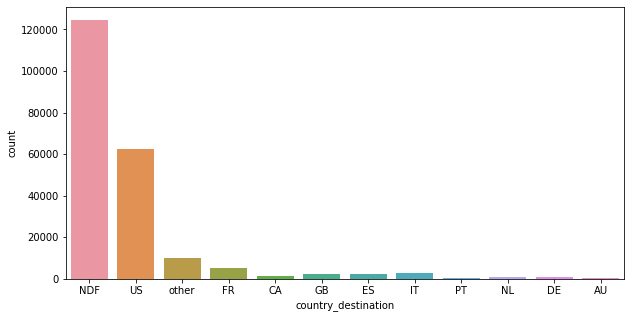

In [12]:
#which country is most visit
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(train_test.country_destination)
plt.show()

c:\users\doaa hesham\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


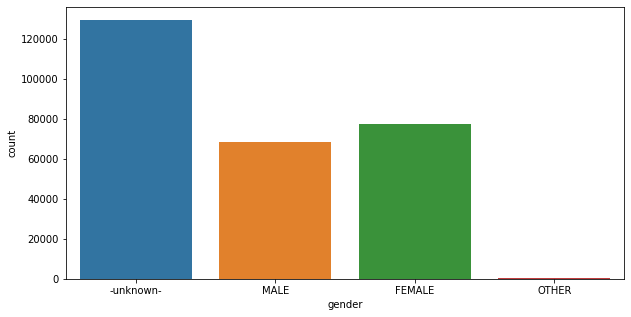

In [13]:
#Who travels more, men or women? 
plt.figure(figsize=(10,5))
sns.countplot(train_test.gender.dropna())
plt.show()

In [14]:
#about ages
train_test.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

#cleaning the data

In [15]:
#replace unkowns in gender and first browsers columns to nan values
train_test.gender.replace("-unknown-",np.nan,inplace=True)
train_test.first_browser.replace("-unknown-",np.nan,inplace=True)

In [16]:
#min and max values are not realistic so handle it by puting range boundiers from 18 to 90 
#and any value out of this range equals to NaN
train_test.loc[train_test['age'] > 90, 'age'] = np.nan
train_test.loc[train_test['age'] < 18, 'age'] = np.nan
train_test.loc[train_test['age'].isnull(), 'age' ] = train_test['age'].median()

In [17]:
#drop date_first_booking because it has many missing values and no values in test data
train_test.drop(['date_first_booking'],axis=1,inplace=True)

In [18]:
#split date_account_created into year and month and day to extract more features
train_test['account_year'] = train_test['date_account_created'].dt.year
train_test['account_month'] = train_test['date_account_created'].dt.month
train_test['account_day'] = train_test['date_account_created'].dt.day

In [19]:
#split timestamp_first_active into year and month and day to extract more features
train_test['timestamp_year'] = train_test['timestamp_first_active'].dt.year
train_test['timestamp_month'] = train_test['timestamp_first_active'].dt.month
train_test['timestamp_day'] = train_test['timestamp_first_active'].dt.day

In [20]:
train_test

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,signup_app,first_device_type,first_browser,country_destination,account_year,account_month,account_day,timestamp_year,timestamp_month,timestamp_day
0,gxn3p5htnn,2010-06-28,2009-03-19,NaN,33.0,facebook,0,en,direct,direct,...,Web,Mac Desktop,Chrome,NDF,2010,6,28,2009,3,19
1,820tgsjxq7,2011-05-25,2009-05-23,MALE,38.0,facebook,0,en,seo,google,...,Web,Mac Desktop,Chrome,NDF,2011,5,25,2009,5,23
2,4ft3gnwmtx,2010-09-28,2009-06-09,FEMALE,56.0,basic,3,en,direct,direct,...,Web,Windows Desktop,IE,US,2010,9,28,2009,6,9
3,bjjt8pjhuk,2011-12-05,2009-10-31,FEMALE,42.0,facebook,0,en,direct,direct,...,Web,Mac Desktop,Firefox,other,2011,12,5,2009,10,31
4,87mebub9p4,2010-09-14,2009-12-08,NaN,41.0,basic,0,en,direct,direct,...,Web,Mac Desktop,Chrome,US,2010,9,14,2009,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,2014-09-30,NaN,31.0,basic,0,en,direct,direct,...,Web,Windows Desktop,IE,NaN,2014,9,30,2014,9,30
62092,zp8xfonng8,2014-09-30,2014-09-30,NaN,33.0,basic,23,ko,direct,direct,...,Android,Android Phone,NaN,NaN,2014,9,30,2014,9,30
62093,fa6260ziny,2014-09-30,2014-09-30,NaN,33.0,basic,0,de,direct,direct,...,Web,Windows Desktop,Firefox,NaN,2014,9,30,2014,9,30
62094,87k0fy4ugm,2014-09-30,2014-09-30,NaN,33.0,basic,0,en,sem-brand,google,...,Web,Mac Desktop,Safari,NaN,2014,9,30,2014,9,30


In [21]:
#drop other columns
train_test.drop(['id', 'date_account_created','timestamp_first_active','country_destination'], axis=1,inplace=True)

In [22]:
#convert featuers from categoricalinto indicator variables
test_train_combin=pd.get_dummies(train_test,columns=['gender','age','signup_method', 'signup_flow', 'language','affiliate_channel', 'affiliate_provider','first_affiliate_tracked', 'signup_app','first_device_type', 'first_browser','account_year','account_month','account_day'])

In [23]:
test_train_combin

,timestamp_year,timestamp_month,timestamp_day,gender_FEMALE,gender_MALE,gender_OTHER,age_18.0,age_19.0,age_20.0,age_21.0,...,account_day_22,account_day_23,account_day_24,account_day_25,account_day_26,account_day_27,account_day_28,account_day_29,account_day_30,account_day_31
0,2009,3,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2009,5,23,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2009,6,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2009,10,31,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,12,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,2014,9,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
62092,2014,9,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
62093,2014,9,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
62094,2014,9,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
train_data.shape[0] 

213451

#create a classifier and modeling

In [25]:
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder

#split combine data into train and test data
train = test_train_combin.values[0:train_data.shape[0]] #split from 0 row to last row in train data
test =test_train_combin.values[train_data.shape[0]:] 

In [26]:
l = LabelEncoder()
label = l.fit_transform(train_data['country_destination'].values)

xgb = XGBClassifier(max_depth=5, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=0)               
xgb.fit(train, label)
prediction_label = xgb.predict_proba(test) 

c:\users\doaa hesham\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
test_ids = test_data['id']
ids = [] 
countries = []  
for i in range(test_data.shape[0]):
    idx = test_ids[i]
    ids += [idx] * 5
    countries += l.inverse_transform(np.argsort(prediction_label[i])[::-1])[:5].tolist() #to transform labels back to original encoding.

id_country= pd.DataFrame(np.column_stack((ids, countries)), columns=['id', 'country'])
id_country.to_csv('submissionFile.csv',index=False)